In [31]:
from sktime.datasets import load_airline
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.theta import ThetaForecaster
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
import pandas as pd
from sktime.utils.plotting import plot_series
import sys
from sklearn.metrics import mean_absolute_error, r2_score
from sktime.forecasting.arima import AutoARIMA
from sktime.forecasting.fbprophet import Prophet
import matplotlib.pyplot as plt
import numpy as np

sys.path.append("..")
import src.utility.plot_settings

In [2]:
y = pd.DataFrame(load_airline())

In [7]:
y

,Number of airline passengers
Period,
1949-01,112.0
1949-02,118.0
1949-03,132.0
1949-04,129.0
1949-05,121.0
...,...
1960-08,606.0
1960-09,508.0
1960-10,461.0


<Axes: xlabel='Period'>

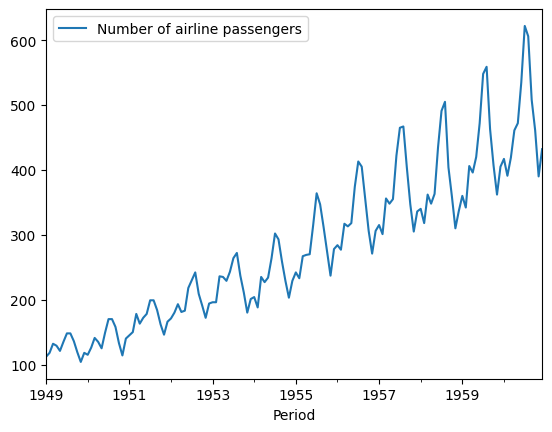

In [8]:
y.plot()

In [10]:
y_train, y_test = temporal_train_test_split(y, train_size=0.8)
fh = ForecastingHorizon(y_test.index, is_relative=False)
forecaster = ThetaForecaster(sp=12)
forecaster.fit(y_train)

ThetaForecaster(sp=12)

In [11]:
y_pred = forecaster.predict(fh)

In [12]:
y_pred

,Number of airline passengers
Period,
1958-08,488.773992
1958-09,433.371044
1958-10,377.148305
1958-11,329.001969
1958-12,372.409438
1959-01,376.347960
1959-02,372.122092
1959-03,427.725595
1959-04,410.511117


In [13]:
mean_absolute_percentage_error(y_test, y_pred)

0.06908937018559067

(<Figure size 1600x400 with 1 Axes>, <Axes: >)

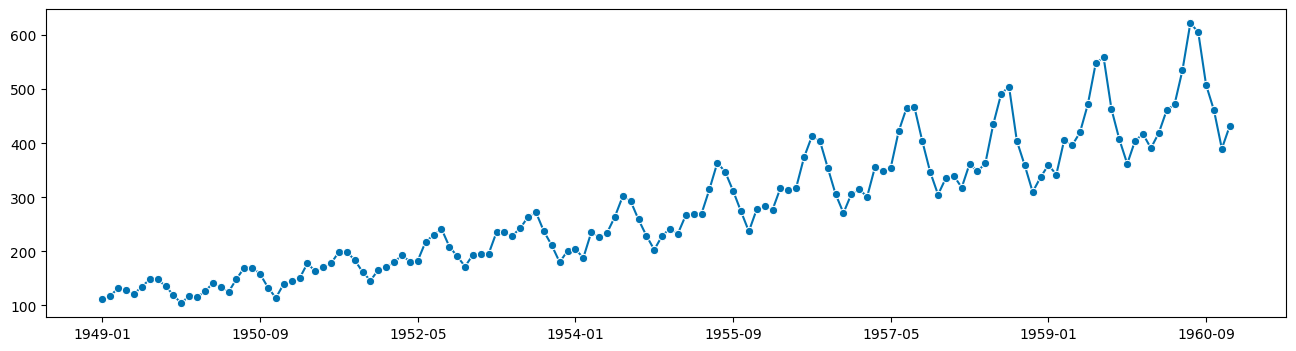

In [15]:
plot_series(y)

(<Figure size 1600x400 with 1 Axes>, <Axes: >)

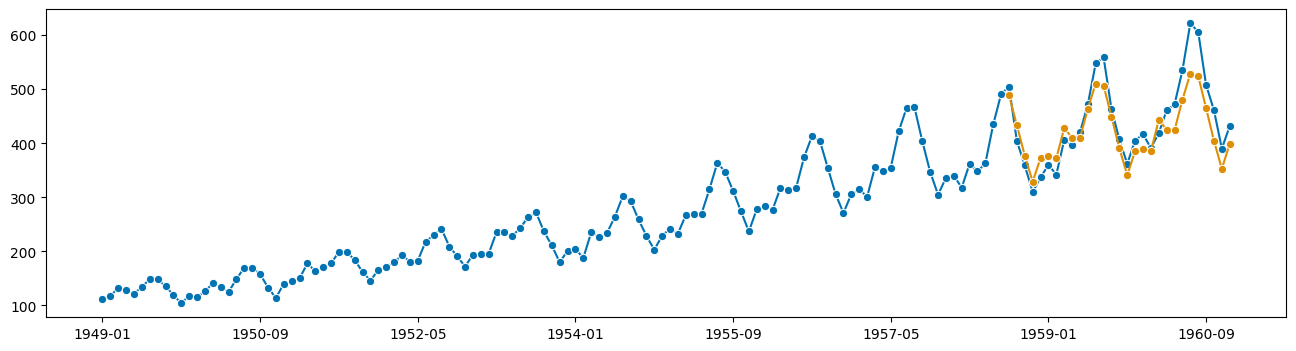

In [16]:
plot_series(y, y_pred)


In [17]:
traffic = pd.read_csv('/Users/juanmanrique/Documents/ai_models/traffic.csv', header=0, sep=',', parse_dates=[0], index_col=[0])

In [18]:
traffic = traffic.pivot(columns='Junction', values='Vehicles')

<Axes: xlabel='DateTime'>

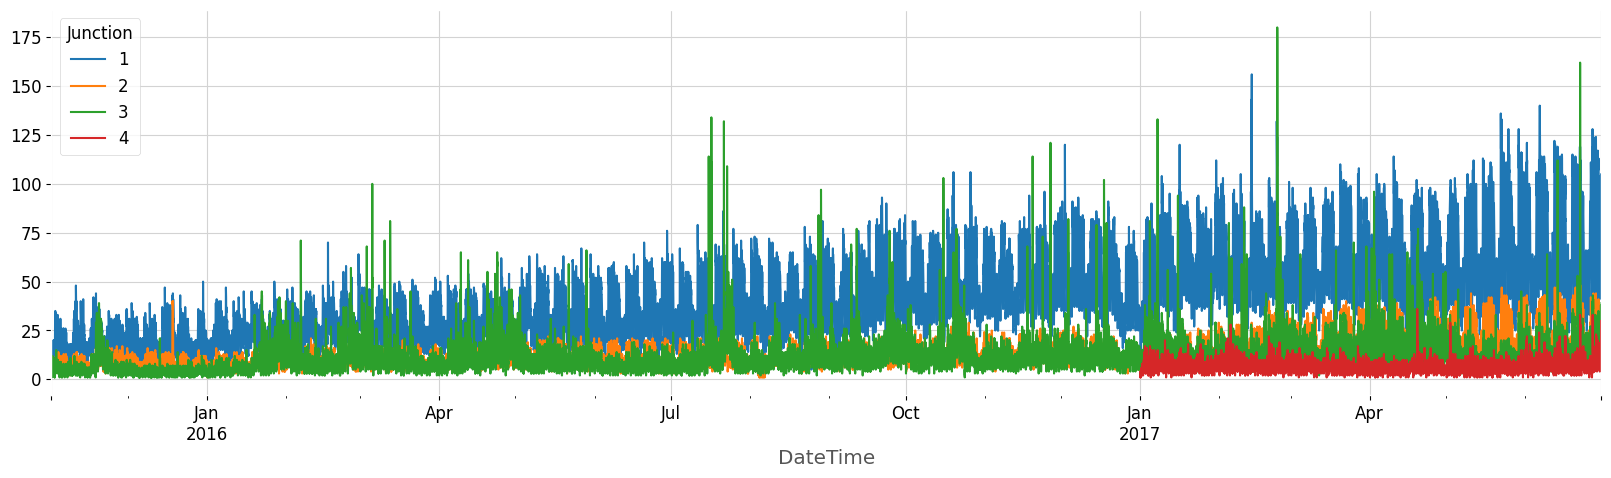

In [22]:
traffic.plot()

In [24]:
traffic.index

DatetimeIndex(['2015-11-01 00:00:00', '2015-11-01 01:00:00',
               '2015-11-01 02:00:00', '2015-11-01 03:00:00',
               '2015-11-01 04:00:00', '2015-11-01 05:00:00',
               '2015-11-01 06:00:00', '2015-11-01 07:00:00',
               '2015-11-01 08:00:00', '2015-11-01 09:00:00',
               ...
               '2017-06-30 14:00:00', '2017-06-30 15:00:00',
               '2017-06-30 16:00:00', '2017-06-30 17:00:00',
               '2017-06-30 18:00:00', '2017-06-30 19:00:00',
               '2017-06-30 20:00:00', '2017-06-30 21:00:00',
               '2017-06-30 22:00:00', '2017-06-30 23:00:00'],
              dtype='datetime64[ns]', name='DateTime', length=14592, freq=None)

In [25]:
traffic.resample(rule='H').sum()

Junction,1,2,3,4
DateTime,,,,
2015-11-01 00:00:00,15.0,6.0,9.0,0.0
2015-11-01 01:00:00,13.0,6.0,7.0,0.0
2015-11-01 02:00:00,10.0,5.0,5.0,0.0
2015-11-01 03:00:00,7.0,6.0,1.0,0.0
2015-11-01 04:00:00,9.0,7.0,2.0,0.0
...,...,...,...,...
2017-06-30 19:00:00,105.0,34.0,33.0,11.0
2017-06-30 20:00:00,96.0,35.0,31.0,30.0
2017-06-30 21:00:00,90.0,31.0,28.0,16.0


In [26]:
traffic.resample(rule='H').sum().index

DatetimeIndex(['2015-11-01 00:00:00', '2015-11-01 01:00:00',
               '2015-11-01 02:00:00', '2015-11-01 03:00:00',
               '2015-11-01 04:00:00', '2015-11-01 05:00:00',
               '2015-11-01 06:00:00', '2015-11-01 07:00:00',
               '2015-11-01 08:00:00', '2015-11-01 09:00:00',
               ...
               '2017-06-30 14:00:00', '2017-06-30 15:00:00',
               '2017-06-30 16:00:00', '2017-06-30 17:00:00',
               '2017-06-30 18:00:00', '2017-06-30 19:00:00',
               '2017-06-30 20:00:00', '2017-06-30 21:00:00',
               '2017-06-30 22:00:00', '2017-06-30 23:00:00'],
              dtype='datetime64[ns]', name='DateTime', length=14592, freq='H')

In [27]:
traffic.resample(rule='D').sum()

Junction,1,2,3,4
DateTime,,,,
2015-11-01,327.0,133.0,136.0,0.0
2015-11-02,546.0,197.0,166.0,0.0
2015-11-03,544.0,217.0,150.0,0.0
2015-11-04,498.0,199.0,121.0,0.0
2015-11-05,464.0,200.0,106.0,0.0
...,...,...,...,...
2017-06-26,1774.0,587.0,414.0,181.0
2017-06-27,2187.0,730.0,567.0,225.0
2017-06-28,2080.0,720.0,503.0,276.0


In [28]:
traffic.resample(rule='D').sum().index

DatetimeIndex(['2015-11-01', '2015-11-02', '2015-11-03', '2015-11-04',
               '2015-11-05', '2015-11-06', '2015-11-07', '2015-11-08',
               '2015-11-09', '2015-11-10',
               ...
               '2017-06-21', '2017-06-22', '2017-06-23', '2017-06-24',
               '2017-06-25', '2017-06-26', '2017-06-27', '2017-06-28',
               '2017-06-29', '2017-06-30'],
              dtype='datetime64[ns]', name='DateTime', length=608, freq='D')

In [48]:
forecast_df = traffic.resample(rule='D').sum()

In [34]:
forecaster = Prophet()

/Users/juanmanrique/Documents/ai_models/env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [35]:
horizon = 30

In [49]:
df = forecast_df[1]

In [50]:
y_train = df[:-horizon]
y_test = df.tail(horizon)

In [51]:
forecaster.fit(y_train)

16:50:25 - cmdstanpy - INFO - Chain [1] start processing
16:50:26 - cmdstanpy - INFO - Chain [1] done processing


Prophet()

In [53]:
fh = ForecastingHorizon(y_test.index, is_relative=False)

In [55]:
y_pred = forecaster.predict(fh)
y_pred

2017-06-01    1790.086800
2017-06-02    1718.715571
2017-06-03    1430.732637
2017-06-04    1397.231739
2017-06-05    1793.245555
2017-06-06    1826.894736
2017-06-07    1821.506390
2017-06-08    1805.203834
2017-06-09    1733.832605
2017-06-10    1445.849670
2017-06-11    1412.348772
2017-06-12    1808.362588
2017-06-13    1842.011770
2017-06-14    1836.623424
2017-06-15    1820.320867
2017-06-16    1748.949638
2017-06-17    1460.966704
2017-06-18    1427.465806
2017-06-19    1823.479622
2017-06-20    1857.128803
2017-06-21    1851.740457
2017-06-22    1835.437901
2017-06-23    1764.066672
2017-06-24    1476.083737
2017-06-25    1442.582839
2017-06-26    1838.596655
2017-06-27    1872.245837
2017-06-28    1866.857491
2017-06-29    1850.554934
2017-06-30    1779.183705
Name: 1, dtype: float64

In [57]:
ci = forecaster.predict_interval(fh, coverage=0.9)
ci

1             
                    0.9             
                  lower        upper
2017-06-01  1617.857667  1977.157896
2017-06-02  1531.342508  1910.327114
2017-06-03  1247.185937  1608.498938
2017-06-04  1208.826297  1581.004549
2017-06-05  1613.886788  1973.055670
2017-06-06  1635.832245  2007.789151
2017-06-07  1618.672180  2009.424854
2017-06-08  1620.406518  1988.620954
2017-06-09  1539.012789  1928.298339
2017-06-10  1247.833400  1633.149393
2017-06-11  1223.174778  1604.224199
2017-06-12  1620.583787  1997.030313
2017-06-13  1653.808651  2024.557872
2017-06-14  1646.492017  2010.219221
2017-06-15  1637.087312  2009.115766
2017-06-16  1564.437463  1935.170036
2017-06-17  1261.728051  1648.306994
2017-06-18  1247.566215  1609.374222
2017-06-19  1633.792820  1999.448934
2017-06-20  1676.696808  2043.031580
2017-06-21  1677.628708  2040.167002
2017-06-22  1640.898572  2015.695680
2017-06-23  1568.224245  1944.886542
2017-06-24  1298.271064  1647.091331
2017-06-25  1259.617881  1641.644385
2017-06-26  1649.869857  2030.473673
2017-06-27  1687.677535  2079.839063
2017-06-28  1676.430539  2045.102183
2017-06-29  1657.837632  2030.092750
2017-06-30  1591.283459  1968.153422

In [59]:
y_true = df.tail(horizon)
y_true

DateTime
2017-06-01    2004.0
2017-06-02    1828.0
2017-06-03    1282.0
2017-06-04    1124.0
2017-06-05    1774.0
2017-06-06    2176.0
2017-06-07    2067.0
2017-06-08    2003.0
2017-06-09    1833.0
2017-06-10    1223.0
2017-06-11    1204.0
2017-06-12    1992.0
2017-06-13    2075.0
2017-06-14    1998.0
2017-06-15    1957.0
2017-06-16    1850.0
2017-06-17    1215.0
2017-06-18    1076.0
2017-06-19    1898.0
2017-06-20    2044.0
2017-06-21    1996.0
2017-06-22    2029.0
2017-06-23    1769.0
2017-06-24    1242.0
2017-06-25    1184.0
2017-06-26    1774.0
2017-06-27    2187.0
2017-06-28    2080.0
2017-06-29    2086.0
2017-06-30    1883.0
Freq: D, Name: 1, dtype: float64

In [61]:
mae = mean_absolute_error(y_true, y_pred)
mae

184.2966823030673

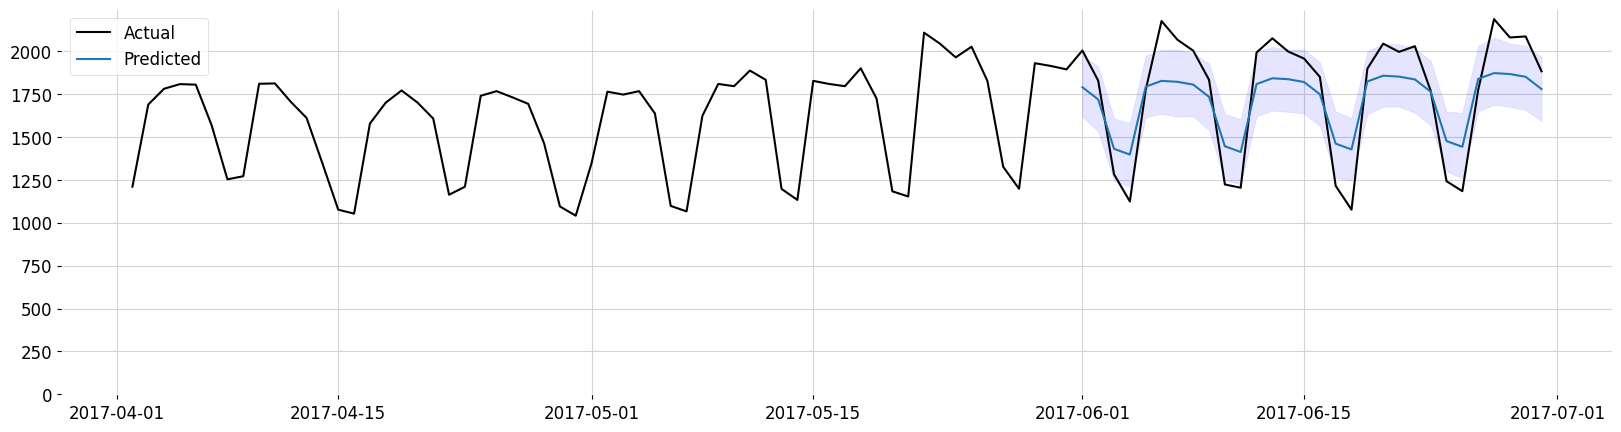

In [63]:
plt.plot(
    df.tail(horizon*3),
    label='Actual',
    color='black'
)
plt.gca().fill_between(
    ci.index, (ci.iloc[:,0]), (ci.iloc[:,1]), color='b', alpha=0.1
)
plt.plot(y_pred, label='Predicted')
plt.ylim(bottom=0)
plt.legend()
plt.show()
plt.show()

In [64]:
forecaster = Prophet()
forecaster.fit(df)

last_date = df.index.max()
fh = ForecastingHorizon(
    pd.date_range(str(last_date), periods=horizon, freq='D'),
    is_relative=False
)

16:59:45 - cmdstanpy - INFO - Chain [1] start processing
16:59:45 - cmdstanpy - INFO - Chain [1] done processing


In [65]:
fh

ForecastingHorizon(['2017-06-30', '2017-07-01', '2017-07-02', '2017-07-03',
               '2017-07-04', '2017-07-05', '2017-07-06', '2017-07-07',
               '2017-07-08', '2017-07-09', '2017-07-10', '2017-07-11',
               '2017-07-12', '2017-07-13', '2017-07-14', '2017-07-15',
               '2017-07-16', '2017-07-17', '2017-07-18', '2017-07-19',
               '2017-07-20', '2017-07-21', '2017-07-22', '2017-07-23',
               '2017-07-24', '2017-07-25', '2017-07-26', '2017-07-27',
               '2017-07-28', '2017-07-29'],
              dtype='datetime64[ns]', freq='D', is_relative=False)

In [66]:
last_date

Timestamp('2017-06-30 00:00:00')

In [67]:
y_pred = forecaster.predict(fh)
ci = forecaster.predict_interval(fh, coverage=0.9).astype('float')

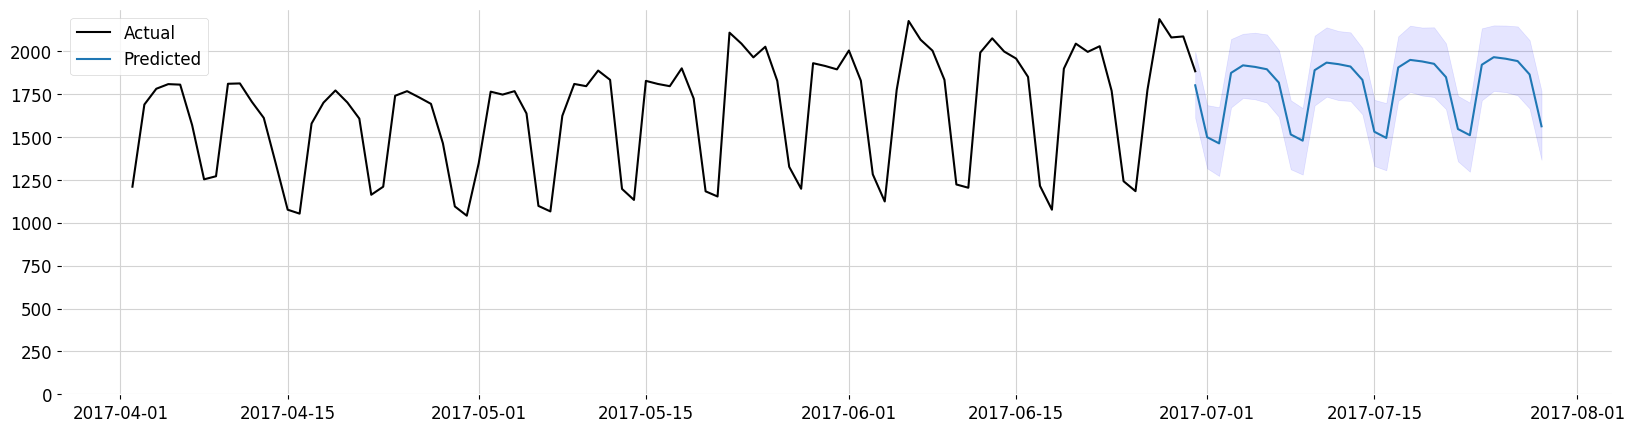

In [68]:
plt.plot(
    df.tail(horizon*3),
    label='Actual',
    color='black'
)
plt.gca().fill_between(
    ci.index, (ci.iloc[:,0]), (ci.iloc[:,1]), color='b', alpha=0.1
)
plt.plot(y_pred, label='Predicted')
plt.ylim(bottom=0)
plt.legend()
plt.show()
plt.show()